# Germany Car Accidents Analysis  

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
df = pd.read_excel('file/New_table.xlsx', sheet_name='Sheet1')
df.head(800)




,Year,Months,Location,Personal Injury Accidents,Serious Accidents (Material Damage),Other Accidents (Intoxication),Other Accidents (Material Damage),Total Accidents
0,2011,January,Inside built-up areas,10595.0,3893.0,970.0,114745.0,130203.0
1,2011,January,Outside built-up areas (excl. motorways/freeways),4995.0,2137.0,181.0,31161.0,38474.0
2,2011,January,On motorways/freeways,1250.0,1094.0,45.0,8985.0,11374.0
3,2011,January,Total,16840.0,7124.0,1196.0,154891.0,180051.0
4,2011,February,Inside built-up areas,11008.0,3548.0,889.0,105064.0,120509.0
...,...,...,...,...,...,...,...,...
667,2024,November,Total,20679.0,5773.0,1143.0,186199.0,213794.0
668,2024,December,Inside built-up areas,NaN,NaN,NaN,NaN,NaN
669,2024,December,Outside built-up areas (excl. motorways/freeways),NaN,NaN,NaN,NaN,NaN
670,2024,December,On motorways/freeways,NaN,NaN,NaN,NaN,NaN


In [114]:
df.columns

Index(['Year', 'Months', 'Location', 'Personal Injury Accidents',
       'Serious Accidents (Material Damage)', 'Other Accidents (Intoxication)',
       'Other Accidents (Material Damage)', 'Total Accidents'],
      dtype='object')

In [115]:
missing_values = df.isnull().sum()
print(missing_values)

Year                                   0
Months                                 0
Location                               0
Personal Injury Accidents              4
Serious Accidents (Material Damage)    4
Other Accidents (Intoxication)         4
Other Accidents (Material Damage)      4
Total Accidents                        4
dtype: int64


## 1. Annual Accident Trends by Location
- ### Classify accidents by year and location

In [ ]:
# Group by year and location, summing Total Accidents
accidents_by_year_location = (
    df.groupby(['Year', 'Location'])[['Total Accidents']]  
    .sum() 
    .unstack()
)

accidents_by_year_location = accidents_by_year_location.rename(columns={
    'Inside built-up areas': 'Urban',
    'On motorways/freeways': 'Highway',
    'Outside built-up areas (excl. motorways/freeways)': 'Non-urban'
})

print("Total Accidents by Year and Location:")
print(accidents_by_year_location)


Total Accidents by Year and Location:
         Total Accidents                                
Location           Urban    Highway Non-urban      Total
Year                                                    
2011            893313.0  1457112.0  203357.0  3867488.0
2012           1751166.0   150943.0  499734.0  2401843.0
2013           1769104.0   152173.0  492734.0  2414011.0
2014           1789278.0   151794.0  465613.0  2406685.0
2015           1854919.0   161096.0  500816.0  2516831.0
2016           1903429.0   174067.0  507831.0  2585327.0
2017           1934538.0   178861.0  529699.0  2643098.0
2018           2002482.0   175995.0  514178.0  2636468.0
2019           2100324.0   177981.0  531842.0  2682144.0
2020           1803696.0   130131.0  469827.0  2198716.0
2021           1732590.0   140525.0  432274.0  2300669.0
2022           1611162.0   147397.0  400334.0  2219050.0
2023           1838802.0   165131.0  508966.0  2512899.0
2024           1687834.0   150728.0  449020.0  228

C:\Users\milos\AppData\Local\Temp\ipykernel_32308\3643232557.py:10: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(accidents_by_year_location.index, accidents_by_year_location[location], marker='o', label=location)


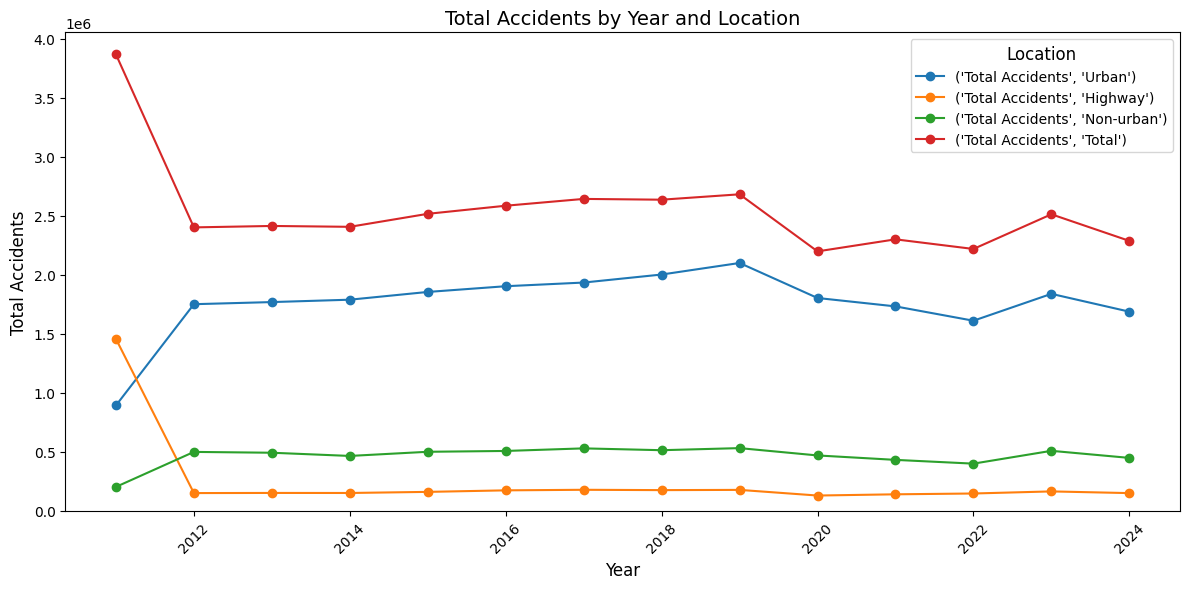

In [ ]:
plt.figure(figsize=(12, 6))

# Plot each location's accident trend over the years
for location in accidents_by_year_location.columns:
    plt.plot(accidents_by_year_location.index, accidents_by_year_location[location], marker='o', label=location)

# Adding title and labels
plt.title("Total Accidents by Year and Location", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Accidents", fontsize=12)

# Adding the legend
plt.legend(title="Location", title_fontsize=12, fontsize=10)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

plt.ylim(bottom=0)

# Display the plot
plt.tight_layout()
plt.show()


#### **Interpretation** 
*As we can see from this data and the corresponding graphic, the number of accidents in urban areas has remained relatively stable from 2012 until now. While there are some fluctuations each year, the values do not show significant oscillations or drastic changes.*

*The overall trend is relatively steady, with minor yearly variations. in 2020 during Corona pandemic we can see slightly less number of accidents and after that from 2023 is increasing slowly again, suggesting a return to pre-pandemic trends as movements and resume activities.*

- ### Objective: Analyze the distribution of accident types.

In [119]:
# Aggregate data by Year and accident type
accident_types = [
'Personal Injury Accidents', 
'Serious Accidents (Material Damage)', 
'Other Accidents (Intoxication)', 
'Other Accidents (Material Damage)'
]

# Group by Year and sum each accident type
accidents_by_year = df.groupby('Year')[accident_types].sum().reset_index()

print(accidents_by_year)




    Year  Personal Injury Accidents  Serious Accidents (Material Damage)  \
0   2011                  1807091.0                            1474432.0   
1   2012                   599274.0                             164294.0   
2   2013                   582210.0                             161648.0   
3   2014                   604870.0                             140958.0   
4   2015                   611318.0                             137552.0   
5   2016                   616290.0                             143276.0   
6   2017                   605312.0                             148922.0   
7   2018                   617442.0                             138322.0   
8   2019                   600286.0                             138378.0   
9   2020                   528998.0                             119944.0   
10  2021                   517974.0                             130247.0   
11  2022                   579344.0                             120485.0   
12  2023    

<Figure size 1200x700 with 0 Axes>

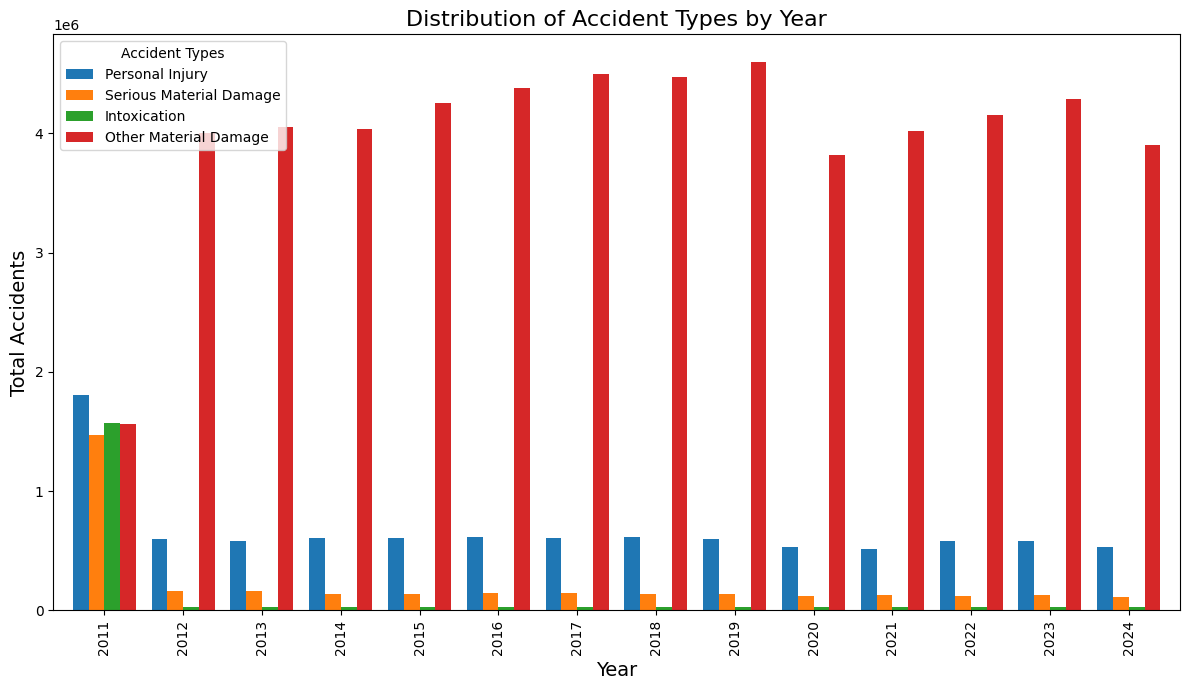

In [ ]:
plt.figure(figsize=(12, 7))

accidents_by_year.set_index('Year')[accident_types].plot(kind='bar', width=0.8, figsize=(12, 7))


plt.title('Distribution of Accident Types by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)


plt.legend(title='Accident Types', labels=['Personal Injury', 'Serious Material Damage', 'Intoxication', 'Other Material Damage'])

plt.tight_layout()
plt.show()

- ### Influence of Speed Limits & Infrastructure:

-From the data that have we can see that on Highways are less accidents than in urban areas. Probably the frequency of traffic is higher in cities and mostly there are lighter accidents, with smaller material damages. On other side on highways are higher speeds and unfortunately there are more injuries and bigger material damages. This is our hypothesis, because in this table we don't have precise data about that and that can be part of some further research.